In [1]:
def barPlot(df, feature):
    # Exploration of this feature
    subclasses = df[feature].value_counts()
    
    # Plotting the distribution of this feature
    plt.figure(figsize=(10, 6))
    plt.bar(subclasses.index, subclasses.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Distribution of ' + feature)
    plt.xticks(subclasses.index, subclasses.index)
    plt.show()

def plot(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Distribution of'+feature)
    plt.show()

def describe_data_based_on_target(df, feature, target):
    
    print(df.groupby(feature)[target].describe())

    # Analyzing the importance of overall quality
    class_targets_means = df.groupby(feature)[target].mean().sort_values(ascending=False)
    class_targets_medians = df.groupby(feature)[target].median().sort_values(ascending=False)

    print("\nMean "+target+" by "+feature+":")
    print(class_targets_means)
    print("\nMedian "+target+" by "+feature+":")
    print(class_targets_medians)

def boxPlot(df, feature, target):
    # Plotting the relationship between building class and target
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.title(feature+' vs ' + target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

def correlation(df, feature, target):
    # Correlation analysis
    correlation = df[feature].corr(df[target])
    print(f"The correlation between {feature} and {target} is: {correlation:.2f}")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


df = pd.read_csv('top_10000_1960-now.csv')
df.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [3]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
Track URI =  9951
Track Name =  8259
Artist URI(s) =  4135
Artist Name(s) =  4130
Album URI =  7463
Album Name =  6637
Album Artist URI(s) =  3299
Album Artist Name(s) =  3295
Album Release Date =  3333
Album Image URL =  7461
-----> CATEGORICAL -----> Disc Number =  10
Track Number =  57
Track Duration (ms) =  7320
Track Preview URL =  6890
-----> CATEGORICAL -----> Explicit =  2
Popularity =  99
ISRC =  8949
-----> CATEGORICAL -----> Added By =  1
Added At =  609
Artist Genres =  2816
Danceability =  780
Energy =  877
-----> CATEGORICAL -----> Key =  13
Loudness =  6330
-----> CATEGORICAL -----> Mode =  3
Speechiness =  1060
Acousticness =  2747
Instrumentalness =  3029
Liveness =  1362
Valence =  995
Tempo =  8622
-----> CATEGORICAL -----> Time Signature =  6
-----> CATEGORICAL -----> Album Genres =  1
Label =  1466
Copyrights =  5379


In [4]:
# Check the number of unique values in each column
unique_counts = df.nunique()
# Get the columns with only one unique value
single_value_columns = unique_counts[unique_counts <= 1].index

# Delete the columns with a single value or no value
df = df.drop(columns=single_value_columns)

In [5]:
df.isnull().any()

Track URI               False
Track Name               True
Artist URI(s)            True
Artist Name(s)           True
Album URI                True
Album Name               True
Album Artist URI(s)      True
Album Artist Name(s)     True
Album Release Date       True
Album Image URL          True
Disc Number             False
Track Number            False
Track Duration (ms)     False
Track Preview URL        True
Explicit                False
Popularity              False
ISRC                     True
Added At                False
Artist Genres            True
Danceability             True
Energy                   True
Key                      True
Loudness                 True
Mode                     True
Speechiness              True
Acousticness             True
Instrumentalness         True
Liveness                 True
Valence                  True
Tempo                    True
Time Signature           True
Label                    True
Copyrights               True
dtype: boo

In [6]:
pdf = df
for c in pdf.columns:
    if np.issubdtype(pdf[c].dtype, np.number):
        pdf = pdf.fillna(pdf[c].mean())
    else:
        mode_value = pdf[c].mode()[0]
        pdf = pdf.fillna(mode_value) # preprocessed df
pdf.isnull().any()

Track URI               False
Track Name              False
Artist URI(s)           False
Artist Name(s)          False
Album URI               False
Album Name              False
Album Artist URI(s)     False
Album Artist Name(s)    False
Album Release Date      False
Album Image URL         False
Disc Number             False
Track Number            False
Track Duration (ms)     False
Track Preview URL       False
Explicit                False
Popularity              False
ISRC                    False
Added At                False
Artist Genres           False
Danceability            False
Energy                  False
Key                     False
Loudness                False
Mode                    False
Speechiness             False
Acousticness            False
Instrumentalness        False
Liveness                False
Valence                 False
Tempo                   False
Time Signature          False
Label                   False
Copyrights              False
dtype: boo

In [7]:
for c in pdf.columns:
    if np.issubdtype(pdf[c].dtype, np.number):
        pdf = pdf[(np.abs(pdf[c] - pdf[c].mean()) / pdf[c].std()) < 3]  # Remove outliers

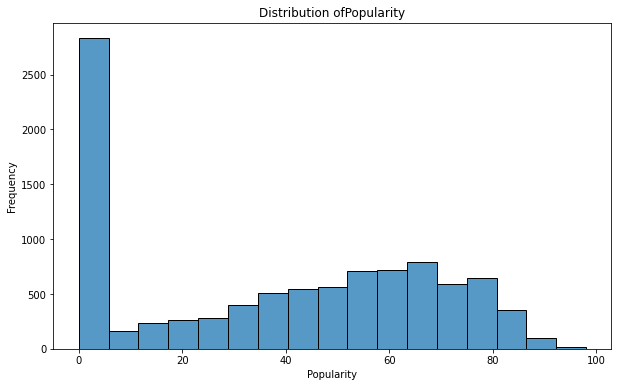

In [8]:
plot(pdf, 'Popularity')

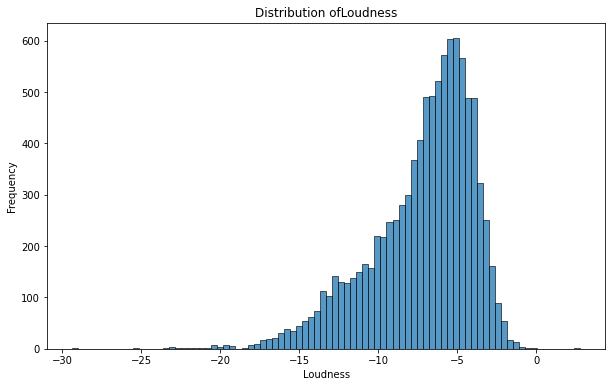

In [9]:
plot(pdf, 'Loudness')

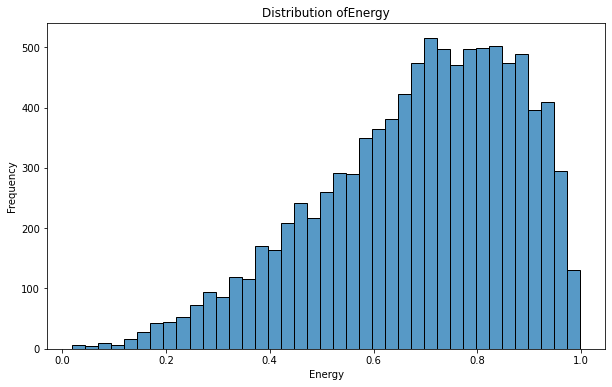

In [10]:
plot(pdf, 'Energy')

In [11]:
pdf.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added At',
       'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Label', 'Copyrights'],
      dtype='object')

# 1st test

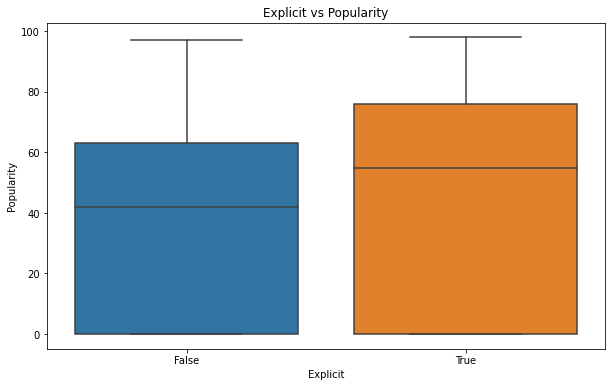

29.63618239672542 5.335591356204322e-08
Probably different distributions


In [12]:
import scipy.stats as stats

boxPlot(pdf, 'Explicit', 'Popularity')

# Group the DataFrame by the 'Explicit' column
grouped = df.groupby('Explicit')


stat, p = stats.f_oneway(*[group['Popularity'] for _, group in grouped])

print(stat, p)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

This analysis focuses on examining the variances in mean values across different explicit states based on popularity. The DataFrame was grouped according to the 'Explicit' column, and the mean popularity values were compared between the groups using an ANOVA (Analysis of Variance) test.

The purpose of the ANOVA test is to determine if there are significant differences in means among the groups. In this analysis, the F-statistic and its corresponding p-value were calculated using the `f_oneway()` function from the `scipy.stats` module.

For the provided dataset, the ANOVA test yielded an F-statistic of 29.63 and a p-value of $10^{-08}$. The F-statistic measures the ratio of between-group variability to within-group variability, while the p-value indicates the statistical significance of the observed mean differences.

Based on the results obtained, when the p-value is lower than the chosen significance level (typically 0.05), it suggests the presence of significant mean differences among the groups. Conversely, if the p-value exceeds the significance level, it indicates insufficient evidence to conclude that the means are different.

In this analysis, the obtained p-value is smaller than the significance level. Consequently, we reject the null hypothesis that the means of the target variable are identical across the groups. This implies that there are likely significant mean differences among the groups.

# 2nd test

In [13]:
from scipy.stats import pearsonr

data1 = pdf['Loudness']
data2 = pdf['Popularity']

stat, p = pearsonr(data1, data2)
print(stat,p)
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

0.03154605632573335 0.001881922743558978
Probably dependent


This is an analysis of the potential relationship between the a song's loudness and its popularity. Based on our analysis, we obtained a correlation coefficient of 0.03 between loudness and popularity. The associated p-value was calculated as 0.001. The p-value is commonly used to determine the statistical significance of a relationship.

Upon conducting a hypothesis test, we found that the p-value less than the significance level of 0.05. Therefore, we reject the null hypothesis that the loudness and popularity are independent. This indicates that there is likely a significant relationship between loudness and popularity.

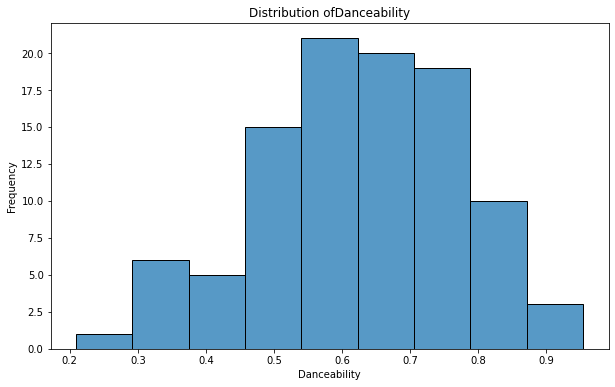

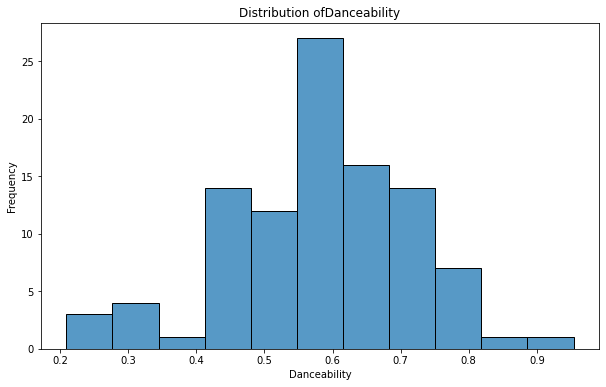

In [14]:
# Sort the DataFrame by the 'popularity' column in descending order
sorted_songs_df = pdf.sort_values(by='Popularity', ascending=False)

# Select the top 100 songs
top_100_songs = sorted_songs_df.head(100)
low_100_songs = sorted_songs_df.tail(100)
plot(top_100_songs, 'Danceability')
plot(low_100_songs, 'Danceability')

# 3rd test

In [15]:
stat, p = stats.f_oneway(top_100_songs['Danceability'], low_100_songs['Danceability'])

print(stat, p)
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

4.510846807225528 0.034921626321315485
Probably different distributions


Here we focus on examining the variances in mean values across different top 100 and lowest 100 songs, based on Danceability. The DataFrame was grouped into more popular and less popular songs, and the mean Danceability values were compared between the groups using an ANOVA (Analysis of Variance) test.

The ANOVA test yielded an F-statistic of 4.5 and a p-value of 0.03. Based on these results, since the obtained p-value is smaller than the significance level, we reject the null hypothesis that the means of the Danceability are identical across the groups. This implies that there are likely significant mean differences among the groups.

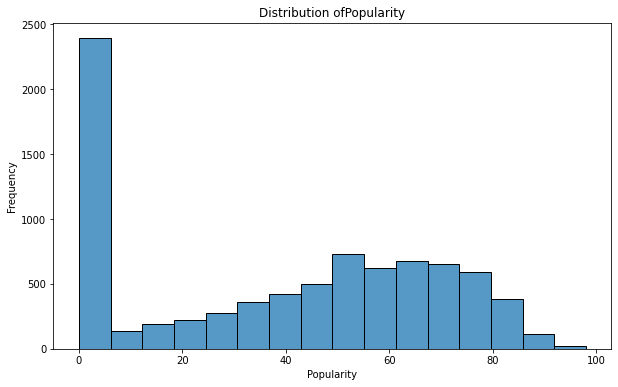

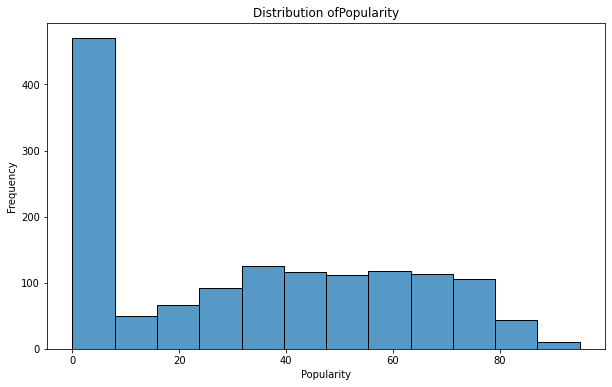

8287
1419


In [16]:
# Group the data based on track number
grouped_songs = pdf.groupby(pdf['Track Number'] < 10)

# Access the group of songs with track numbers less than 10
less_than_10_group = grouped_songs.get_group(True)

# Access the group of songs with track numbers greater than or equal to 10
greater_than_or_equal_to_10_group = grouped_songs.get_group(False)


plot(less_than_10_group, 'Popularity')
plot(greater_than_or_equal_to_10_group, 'Popularity')

print(len(less_than_10_group))
print(len(greater_than_or_equal_to_10_group))

# 4th test

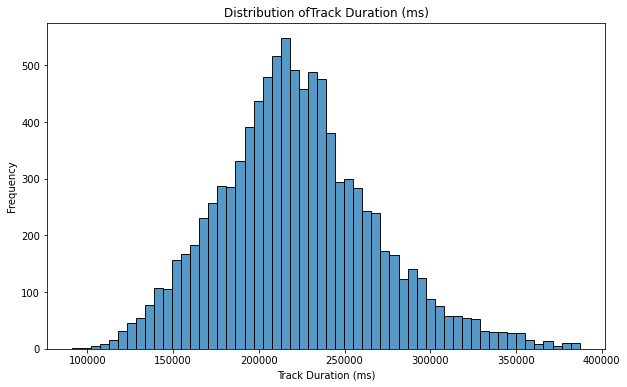

0.026666057757115433 0.008607983016838017
Probably dependent


In [17]:
plot(pdf, 'Track Duration (ms)')

data1 = pdf['Track Duration (ms)']
data2 = pdf['Popularity']

stat, p = pearsonr(data1, data2)
print(stat,p)
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

# 5th test

In [18]:
from scipy.stats import normaltest
data = pdf['Track Duration (ms)']
stat, p = normaltest(data)
print(stat, p)
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

307.1073482785617 2.05346188103975e-67
Probably not Gaussian
